### 📘 사이킷런 군집(Clustering) 수업자료

---

### 1️⃣ 군집(Clustering)이란?

군집은 **정답(label) 없이 비슷한 데이터끼리 묶는 비지도학습 방법**이다.

- 지도학습 → 정답 있음
- 비지도학습 → 정답 없음
- 목표 → 데이터의 숨겨진 구조 찾기

예시:
- 고객 세분화
- 뉴스 기사 주제 분류
- 이상치 탐지
- 이미지 그룹화

---

### 2️⃣ 대표적인 군집 알고리즘

### 🔵 1. K-Means

### 특징
- 가장 많이 사용
- 중심점(centroid) 기반
- k 값을 미리 정해야 함

### 동작 과정
1. 중심점 k개 생성
2. 가까운 중심으로 데이터 할당
3. 중심 재계산
4. 반복

---

### 🔵 2. DBSCAN

### 특징
- 밀도 기반 알고리즘
- k값 필요 없음
- 이상치 탐지 가능
- 불규칙한 모양의 군집 가능

### 주요 파라미터
- eps: 반경 거리
- min_samples: 최소 데이터 개수

---

### 🔵 3. 계층적 군집 (Hierarchical Clustering)

### 특징
- 트리 구조로 군집 생성
- 덴드로그램으로 시각화
- 군집 개수를 나중에 결정 가능

---

### 3️⃣ 실습: 데이터 생성

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, random_state=42)

plt.scatter(X[:,0], X[:,1])
plt.title("Original Data")
plt.show()


생성된 강남구 고객 위치 데이터 예시:
    Latitude   Longitude
0  37.500880  127.022626
1  37.497070  127.024239
2  37.501786  127.032084
3  37.507038  127.031262
4  37.496495  127.027475


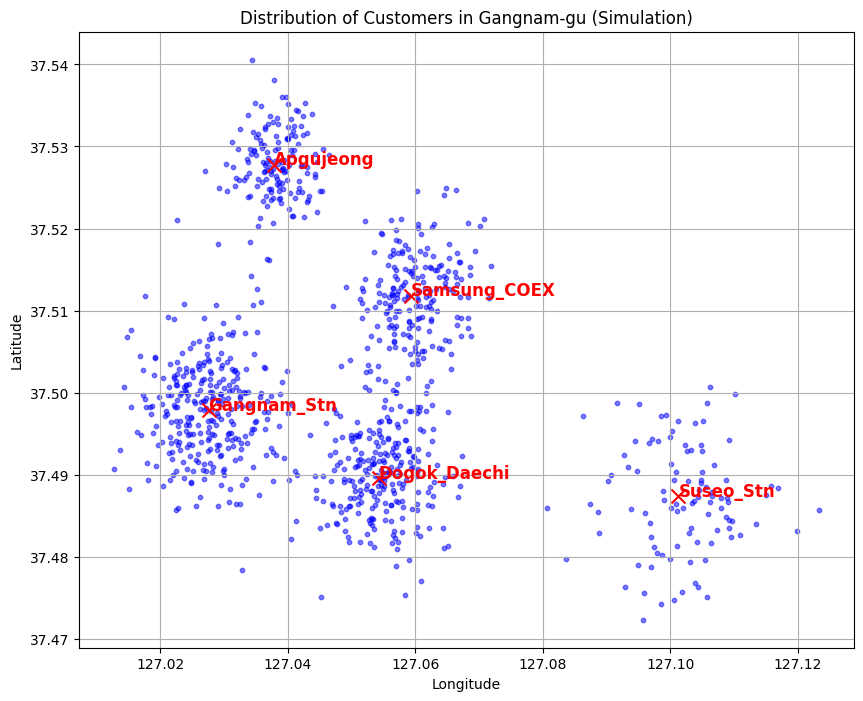

In [ ]:
# ==========================================================
# [실습 1] 강남구 고객 위치 데이터(가상) 만들기
# - 목표: 군집 알고리즘(K-Means 등)에 넣을 2차원 좌표 데이터를 만든다.
# - 포인트: 현실처럼 '특정 거점 근처에 고객이 몰려있는' 분포를 흉내낸다.
# ==========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) 랜덤 시드(seed) 고정
# - 난수(랜덤)를 사용하는 코드는 실행할 때마다 결과가 달라질 수 있다.
# - seed를 고정하면 "항상 같은 랜덤 값"이 나와서 실습/디버깅이 쉬워진다.
np.random.seed(42)

# 2) 강남구 주요 거점 좌표 설정 (중심점 역할)
# - 실제 데이터가 아니라 '시뮬레이션'이므로, 고객이 많이 모일 만한 중심 위치를 정한다.
# - 각 중심점 주변으로 정규분포(가우시안) 형태로 고객 좌표를 흩뿌릴 예정이다.
# - 좌표 형식: [위도(Latitude), 경도(Longitude)]
centers = {
    'Gangnam_Stn': [37.4979, 127.0276],   # 강남역 (상업지구)
    'Samsung_COEX': [37.5118, 127.0593], # 삼성역 (오피스/쇼핑)
    'Dogok_Daechi': [37.4896, 127.0543], # 도곡/대치 (주거/학원가)
    'Apgujeong': [37.5278, 127.0378],    # 압구정 (고급 주거/상권)
    'Suseo_Stn': [37.4874, 127.1013]     # 수서역 (교통 요충지)
}

# 3) 데이터 생성 함수
def generate_gangnam_data():
    """강남구 고객 위치 좌표(위도/경도)를 가상으로 생성한다.

    아이디어:
    - 여러 개의 '거점(중심점)'을 정해두고
    - 각 거점 주변에 정규분포로 점들을 생성해서
    - '사람이 많이 모이는 지역'이 자연스럽게 나타나도록 만든다.

    참고:
    - 이 예시는 거점별 개수(counts)를 고정해서 총 1000개를 만든다.
    """
    data = []  # 최종 좌표가 차곡차곡 쌓일 리스트

    # (중요) 각 거점별로 생성할 데이터 개수
    # - 균등하게 만들 수도 있지만, 현실처럼 지역별 유동인구가 다르다고 가정해 불균형하게 설정
    # - 합계: 300 + 200 + 250 + 150 + 100 = 1000
    counts = [300, 200, 250, 150, 100]

    # 거점별 퍼짐 정도(표준편차, standard deviation)
    # - 값이 클수록 중심점에서 더 넓게 퍼진다.
    # - 위/경도 0.005도는 대략 수백 미터 수준(지역에 따라 차이는 있음)
    spreads = [0.006, 0.005, 0.005, 0.004, 0.007]

    keys = list(centers.keys())

    # 각 거점에 대해: (1) 중심 좌표 꺼내기 → (2) 난수로 주변 좌표 생성 → (3) data에 추가
    for i, key in enumerate(keys):
        center = centers[key]    # 예: [37.4979, 127.0276]
        count = counts[i]        # 이 거점에서 만들 점 개수
        spread = spreads[i]      # 이 거점에서의 퍼짐 정도

        # 정규분포(Gaussian)로 중심 주변 좌표 생성
        # - np.random.normal(평균, 표준편차, 개수)
        # - 위도는 center[0] 근처, 경도는 center[1] 근처에서 랜덤 생성
        latitudes = np.random.normal(center[0], spread, count)
        longitudes = np.random.normal(center[1], spread, count)

        # 위도/경도를 한 쌍씩 묶어서 data 리스트에 저장
        for lat, lon in zip(latitudes, longitudes):
            data.append([lat, lon])

    # 머신러닝에 쓰기 편하게 numpy 배열로 변환해서 반환
    return np.array(data)

# 4) 데이터 생성 실행
X = generate_gangnam_data()  # 결과 shape: (1000, 2) 비슷한 형태가 됨

# 5) DataFrame으로 변환 (컬럼명을 붙여서 보기 좋게)
df_gangnam = pd.DataFrame(X, columns=['Latitude', 'Longitude'])

# 데이터 미리보기 (상위 5개)
print("생성된 강남구 고객 위치 데이터 예시:")
print(df_gangnam.head())

# 6) 시각화 (의도대로 '거점 주변에 뭉쳐있는지' 확인)
plt.figure(figsize=(10, 8))
plt.scatter(
    df_gangnam['Longitude'], df_gangnam['Latitude'],
    s=10, alpha=0.5, c='blue'
 )
plt.title('Distribution of Customers in Gangnam-gu (Simulation)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# 주요 거점 표시 (빨간 X + 텍스트)
for key, coords in centers.items():
    plt.text(coords[1], coords[0], key, fontsize=12, fontweight='bold', color='red')
    plt.scatter(coords[1], coords[0], marker='x', c='red', s=100)

plt.show()

# 7) CSV 저장
# - 다음 셀(K-Means)에서 이 파일을 읽어서 군집화를 진행한다.
df_gangnam.to_csv('gangnam_starbuks.csv', index=False)

      Latitude   Longitude
0    37.500880  127.022626
1    37.497070  127.024239
2    37.501786  127.032084
3    37.507038  127.031262
4    37.496495  127.027475
..         ...         ...
995  37.484810  127.108791
996  37.485588  127.101114
997  37.498591  127.095127
998  37.491326  127.100159
999  37.485332  127.096086

[1000 rows x 2 columns]
>>> [분석 결과] 최적의 입지 후보 3곳 (위도, 경도) <<<
매장 1 후보지: 위도 37.506264, 경도 127.053257
매장 2 후보지: 위도 37.487056, 경도 127.101906
매장 3 후보지: 위도 37.499598, 경도 127.028091


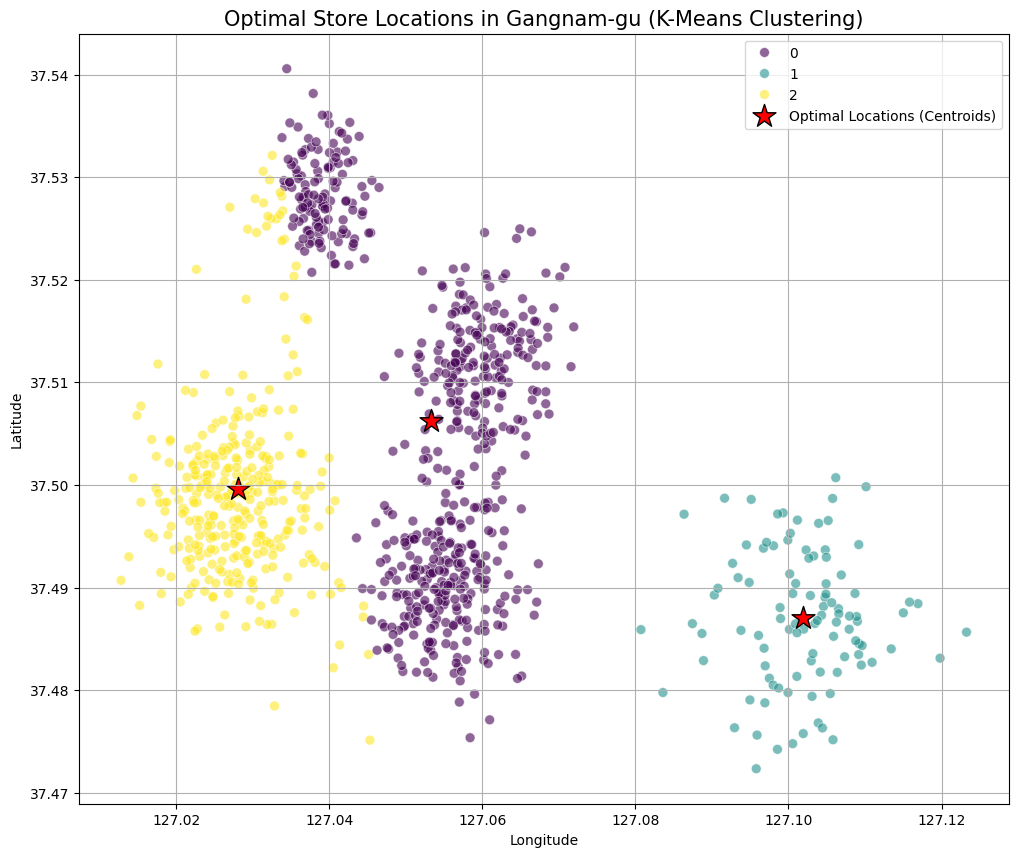

In [ ]:
# ==========================================================
# [실습 2] K-Means로 "매장 최적 입지(중심점)" 찾기
# - 목표: 고객 좌표를 k개의 그룹(클러스터)으로 나누고
#         각 그룹의 중심(centroid)을 '매장 후보지'로 해석한다.
# ==========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns  # 시각화를 조금 더 보기 좋게

# 1) 데이터 불러오기
data = pd.read_csv('gangnam_starbuks.csv')

# CSV에는 보통 불필요한 컬럼이 섞일 수 있어서, 필요한 컬럼만 명시적으로 선택
df = pd.DataFrame(data, columns=['Latitude', 'Longitude'])
print("[입력 데이터 미리보기]")
print(df.head())

# ==========================================
# 2) K-Means 알고리즘 적용 (핵심)
# ==========================================

# K-Means는 '몇 개의 군집으로 나눌지(k)'를 먼저 정해야 한다.
# 여기서는 "매장 3개를 짓는다"고 가정해서 k=3으로 설정
kmeans = KMeans(n_clusters=3, random_state=42)

# fit(): 데이터를 보고 군집을 학습(중심점 위치를 반복적으로 업데이트)
kmeans.fit(df[['Latitude', 'Longitude']])

# labels_: 각 데이터(고객)가 몇 번 군집에 속하는지 0,1,2 같은 번호로 나온다.
df['Cluster'] = kmeans.labels_

# cluster_centers_: 각 군집의 중심점 좌표 (위도, 경도)
optimal_locations = kmeans.cluster_centers_

# ==========================================
# 3) 결과 출력 및 시각화
# ==========================================

print(">>> [분석 결과] 최적의 입지 후보 3곳 (위도, 경도) <<<")
for i, loc in enumerate(optimal_locations):
    print(f"매장 {i+1} 후보지: 위도 {loc[0]:.6f}, 경도 {loc[1]:.6f}")

# 시각화: 고객 점들은 군집별로 색을 다르게, 중심점은 별(*)로 표시
plt.figure(figsize=(12, 10))

# 1) 고객 데이터(산점도) - hue='Cluster'로 군집별 색상 지정
sns.scatterplot(
    x='Longitude', y='Latitude', hue='Cluster', data=df,
    palette='viridis', s=50, alpha=0.6, legend='full'
)

# 2) 중심점(입지 후보) 표시 - 빨간 별(*)
plt.scatter(
    optimal_locations[:, 1], optimal_locations[:, 0],
    s=300, c='red', marker='*',
    label='Optimal Locations (Centroids)',
    edgecolors='black'
)

plt.title('Optimal Store Locations in Gangnam-gu (K-Means Clustering)', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

   monthly_spend  visit_count
0     224.835708     8.715575
1     193.086785     9.121569
2     232.384427    10.166102
3     276.151493    10.107604
4     188.292331     5.244661
클러스터 개수(노이즈 제외): 2
노이즈(이상치) 개수: 12

[군집별 고객 수]
cluster
-1     12
 0    340
 1    114
Name: count, dtype: int64


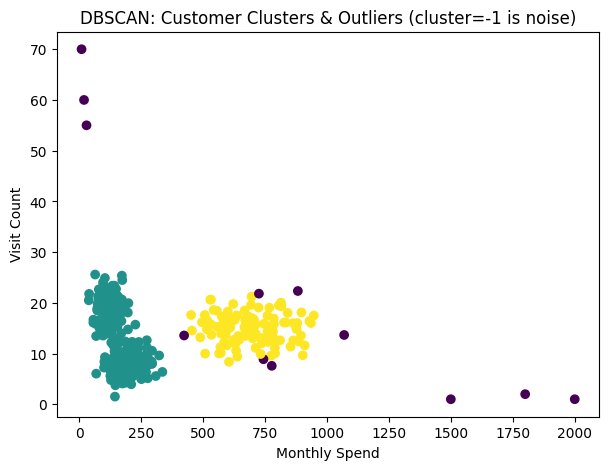


[이상치(노이즈) 고객 샘플]
     monthly_spend  visit_count  cluster
462    2000.000000     1.000000       -1
461    1800.000000     2.000000       -1
460    1500.000000     1.000000       -1
278    1069.465697    13.667120       -1
294     882.774889    22.337256       -1
224     777.445114     7.585066       -1
246     743.991790     8.885626       -1
263     725.677589    21.812079       -1
271     423.769460    13.567028       -1
464      30.000000    55.000000       -1
463      20.000000    60.000000       -1
465      10.000000    70.000000       -1


In [ ]:
# ==========================================================
# [실습 3] DBSCAN으로 "이상치(노이즈)" 탐지하기
# - 목적: 데이터를 군집화하면서, 어디에도 속하지 않는 점을 noise(-1)로 표시한다.
# - 활용: 사기/비정상 고객, 특이 행동 패턴 탐지 등
# ==========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1) 데이터 로드
# - out_visit.csv는 예시로, 고객의 월 지출(monthly_spend)과 방문 횟수(visit_count)가 있다고 가정
# - index_col은 저장된 인덱스 컬럼을 다시 인덱스로 사용하기 위한 옵션(파일 형태에 따라 다를 수 있음)
df = pd.read_csv('out_visit.csv', index_col='Unnamed: 0')

print("[데이터 미리보기]")
print(df.head())

# ----------------------------
# 2) 스케일링(필수!)
# ----------------------------
# DBSCAN은 '거리(distance)' 기반 알고리즘이다.
# - monthly_spend(예: 0~수백만원)과 visit_count(예: 0~수십)는 단위/범위가 다르다.
# - 그대로 쓰면 큰 스케일(지출)이 거리를 지배해서 결과가 왜곡될 수 있다.
# 그래서 StandardScaler로 평균 0, 표준편차 1로 맞춰준다.
scaler = StandardScaler()
X = scaler.fit_transform(df[["monthly_spend", "visit_count"]])

# ----------------------------
# 3) DBSCAN 학습
# ----------------------------
# eps: 이웃으로 간주할 반경(거리). 너무 작으면 다 노이즈, 너무 크면 한 덩어리가 되기 쉽다.
# min_samples: 이웃 최소 개수. 이 조건을 만족하면 '코어 포인트'로 군집의 핵심이 된다.
dbscan = DBSCAN(eps=0.35, min_samples=8)
labels = dbscan.fit_predict(X)  # 각 데이터의 군집 번호(노이즈는 -1)

# 원본 데이터프레임에 군집 결과를 붙여서 분석하기 쉽게 만든다
df["cluster"] = labels

# ----------------------------
# 4) 결과 요약
# ----------------------------
# 군집 개수 계산: label 종류에서 -1(노이즈)이 있으면 제외
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = (labels == -1).sum()

print(f"클러스터 개수(노이즈 제외): {n_clusters}")
print(f"노이즈(이상치) 개수: {n_noise}")

print("\n[군집별 고객 수]")
print(df["cluster"].value_counts().sort_index())

# ----------------------------
# 5) 시각화
# ----------------------------
# - 색(c)에 cluster 값을 주면 군집별로 다른 색으로 표시된다.
# - cluster=-1(노이즈)은 보통 다른 색으로 눈에 띄게 나온다.
plt.figure(figsize=(7, 5))
plt.scatter(df["monthly_spend"], df["visit_count"], c=df["cluster"])
plt.xlabel("Monthly Spend")
plt.ylabel("Visit Count")
plt.title("DBSCAN: Customer Clusters & Outliers (cluster=-1 is noise)")
plt.show()

# ----------------------------
# 6) 이상치(노이즈)만 뽑기
# ----------------------------
# noise로 분류된 고객만 필터링해서 별도로 확인/조사할 수 있다.
outliers = df[df["cluster"] == -1].copy()
print("\n[이상치(노이즈) 고객 샘플]")
print(outliers.sort_values(["monthly_spend", "visit_count"], ascending=False).head(20))


In [ ]:
print("\n결과 요약:")
print(f"Decision Tree - Accuracy: {dt_acc:.4f}, F1-score: {dt_f1:.4f}")
print(f"Random Forest - Accuracy: {rf_acc:.4f}, F1-score: {rf_f1:.4f}")
